In [1]:
import sys
sys.path.append('../')
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv("seattleWeather_1948-2017.csv")

In [3]:
data = data[['DATE', 'TMIN', 'TMAX']]

In [6]:
tmax = np.array(data[['TMAX', 'DATE']])

In [9]:
tmax.shape

(25551, 2)

In [11]:
tmax[:100, 1]

array(['1948-01-01', '1948-01-02', '1948-01-03', '1948-01-04',
       '1948-01-05', '1948-01-06', '1948-01-07', '1948-01-08',
       '1948-01-09', '1948-01-10', '1948-01-11', '1948-01-12',
       '1948-01-13', '1948-01-14', '1948-01-15', '1948-01-16',
       '1948-01-17', '1948-01-18', '1948-01-19', '1948-01-20',
       '1948-01-21', '1948-01-22', '1948-01-23', '1948-01-24',
       '1948-01-25', '1948-01-26', '1948-01-27', '1948-01-28',
       '1948-01-29', '1948-01-30', '1948-01-31', '1948-02-01',
       '1948-02-02', '1948-02-03', '1948-02-04', '1948-02-05',
       '1948-02-06', '1948-02-07', '1948-02-08', '1948-02-09',
       '1948-02-10', '1948-02-11', '1948-02-12', '1948-02-13',
       '1948-02-14', '1948-02-15', '1948-02-16', '1948-02-17',
       '1948-02-18', '1948-02-19', '1948-02-20', '1948-02-21',
       '1948-02-22', '1948-02-23', '1948-02-24', '1948-02-25',
       '1948-02-26', '1948-02-27', '1948-02-28', '1948-02-29',
       '1948-03-01', '1948-03-02', '1948-03-03', '1948-

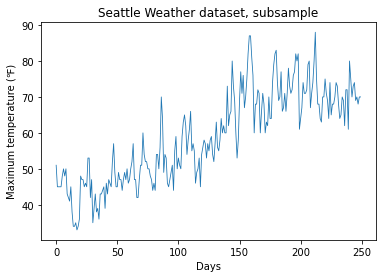

In [22]:
a = plt.plot(tmax[:250, 0], linewidth=0.8, alpha=1)
a = plt.xlabel('Days')
a= plt.ylabel('Maximum temperature (℉)')
a = plt.title('Seattle Weather dataset, subsample')
resolution_value = 600
plt.savefig("seattle wheather subsample.png", format="png", dpi=resolution_value)

In [5]:
data.shape

(25551, 3)

In [6]:
data['DATE'] = pd.DatetimeIndex(data['DATE'])

In [7]:
data.head()

,DATE,TMIN,TMAX
0,1948-01-01,42,51
1,1948-01-02,36,45
2,1948-01-03,35,45
3,1948-01-04,34,45
4,1948-01-05,32,45


In [8]:
data.tail()

,DATE,TMIN,TMAX
25546,2017-12-10,34,49
25547,2017-12-11,29,49
25548,2017-12-12,32,46
25549,2017-12-13,34,48
25550,2017-12-14,36,50


In [9]:
data_test = data[pd.DatetimeIndex(data['DATE']).year >= 2000]
data_train = data[pd.DatetimeIndex(data['DATE']).year < 2000]

In [10]:
pre_train = torch.tensor(np.array(data_train[['TMAX']])).unsqueeze(0)
pre_test = torch.tensor(np.array(data_test[['TMAX']])).unsqueeze(0)

In [11]:
pre_train.shape

torch.Size([1, 18993, 1])

In [12]:
n_x, n_y = 60, 30
train = []
for i in range(0, pre_train.shape[1]-n_x-n_y):
    try:
        train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
    except:
        pass

train = torch.cat(train, dim=0)

test = []
for i in range(0, pre_test.shape[1]-n_x-n_y):
    try:
        test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))
    except:
        pass

test = torch.cat(test, dim=0)

C:\Users\pere9\AppData\Local\Temp\ipykernel_3724\1016728292.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train.append(torch.tensor(pre_train[:, i:(i+n_x+n_y), :]))
C:\Users\pere9\AppData\Local\Temp\ipykernel_3724\1016728292.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test.append(torch.tensor(pre_test[:, i:(i+n_x+n_y), :]))


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train.shape

torch.Size([18903, 90, 1])

In [15]:
train, val = train_test_split(train, test_size=0.20, random_state=42)

In [16]:
train.shape, val.shape, test.shape

(torch.Size([15122, 90, 1]),
 torch.Size([3781, 90, 1]),
 torch.Size([6468, 90, 1]))

In [17]:
data = {}

In [18]:
data['X_train'], data['Y_train'] = train[:, :n_x, :].float(), train[:, (n_x-1):, :1].float()
data['X_val'], data['Y_val'] = val[:, :n_x, :].float(), val[:, (n_x-1):, :1].float()
data['X_test'], data['Y_test'] = test[:, :n_x, :].float(), test[:, (n_x-1):, :1].float()

In [19]:
data['X_train'] = torch.cat([torch.arange(0, data['X_train'].shape[1]).repeat(
    data['X_train'].shape[0], 1).unsqueeze(2), data['X_train']], dim=2)

data['Y_train'] = torch.cat([torch.arange(0, data['Y_train'].shape[1]).repeat(
    data['Y_train'].shape[0], 1).unsqueeze(2), data['Y_train']], dim=2)

data['X_val'] = torch.cat([torch.arange(0, data['X_val'].shape[1]).repeat(
    data['X_val'].shape[0], 1).unsqueeze(2), data['X_val']], dim=2)

data['Y_val'] = torch.cat([torch.arange(0, data['Y_val'].shape[1]).repeat(
    data['Y_val'].shape[0], 1).unsqueeze(2), data['Y_val']], dim=2)

data['X_test'] = torch.cat([torch.arange(0, data['X_test'].shape[1]).repeat(
    data['X_test'].shape[0], 1).unsqueeze(2), data['X_test']], dim=2)

data['Y_test'] = torch.cat([torch.arange(0, data['Y_test'].shape[1]).repeat(
    data['Y_test'].shape[0], 1).unsqueeze(2), data['Y_test']], dim=2)

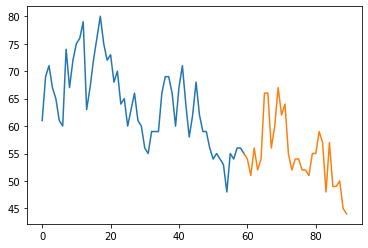

In [20]:
plt.plot(data['X_train'][0, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][0, :, 1])

In [22]:
mean, std = data['X_train'][:, :, 1].mean(), data['X_train'][:, :, 1].std()

In [23]:
for dataset in data:
    data[dataset][:, :, 1] = (data[dataset][:, :, 1]-mean)/std

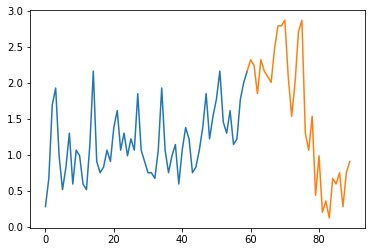

In [24]:
i=100
plt.plot(data['X_train'][i, :, 1])
plt.plot(data['X_train'][0, -1, 0]+data['Y_train'][0, :, 0], data['Y_train'][i, :, 1])

In [26]:
stats = {'mean': mean, 'std': std}

In [28]:
torch.save(stats, 'stats_data.pt')

In [28]:
torch.save(data, 'data.pt')

### Some data analysis

In [31]:
stats_data = torch.load('stats_data.pt')

In [44]:
x = data['X_train'][:, -1:, 1:]
y = data['Y_train'][:, 1:, 1:]

In [45]:
inc = torch.ones(y.shape)*x
inc_ = y-inc
inc_max = torch.max(inc_, dim=1)[0].squeeze(1)

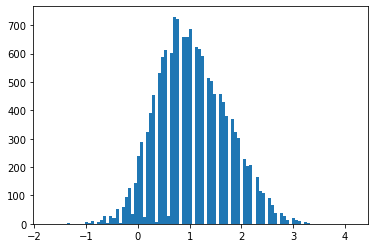

In [46]:
a = plt.hist(inc_max.numpy(), bins=100)

In [48]:
np.quantile(inc_max, 0.95)

2.194481134414673

In [41]:
inc_min = torch.min(inc_, dim=1)[0].squeeze(1)

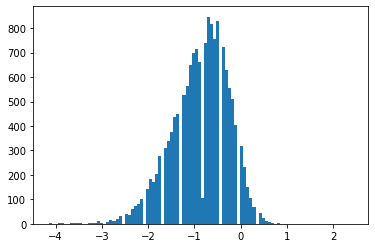

In [42]:
a = plt.hist(inc_min.numpy(), bins=100)

In [49]:
np.quantile(inc_min, 0.05)

-1.9593582153320312